In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:

# Load the Top Spotify Songs dataset with a different encoding
spotify_df = pd.read_csv(r"C:\Users\Musaga\Desktop\INST 414\Medium post\Medium post 2\spotify-2023.csv", encoding='latin1')

# Remove special characters from artist(s)_name column
spotify_df['artist(s)_name'] = spotify_df['artist(s)_name'].str.replace(r'[^a-zA-Z0-9\s]-?', '')




# Print the DataFrame
spotify_df.head()

,Song,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
4,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24


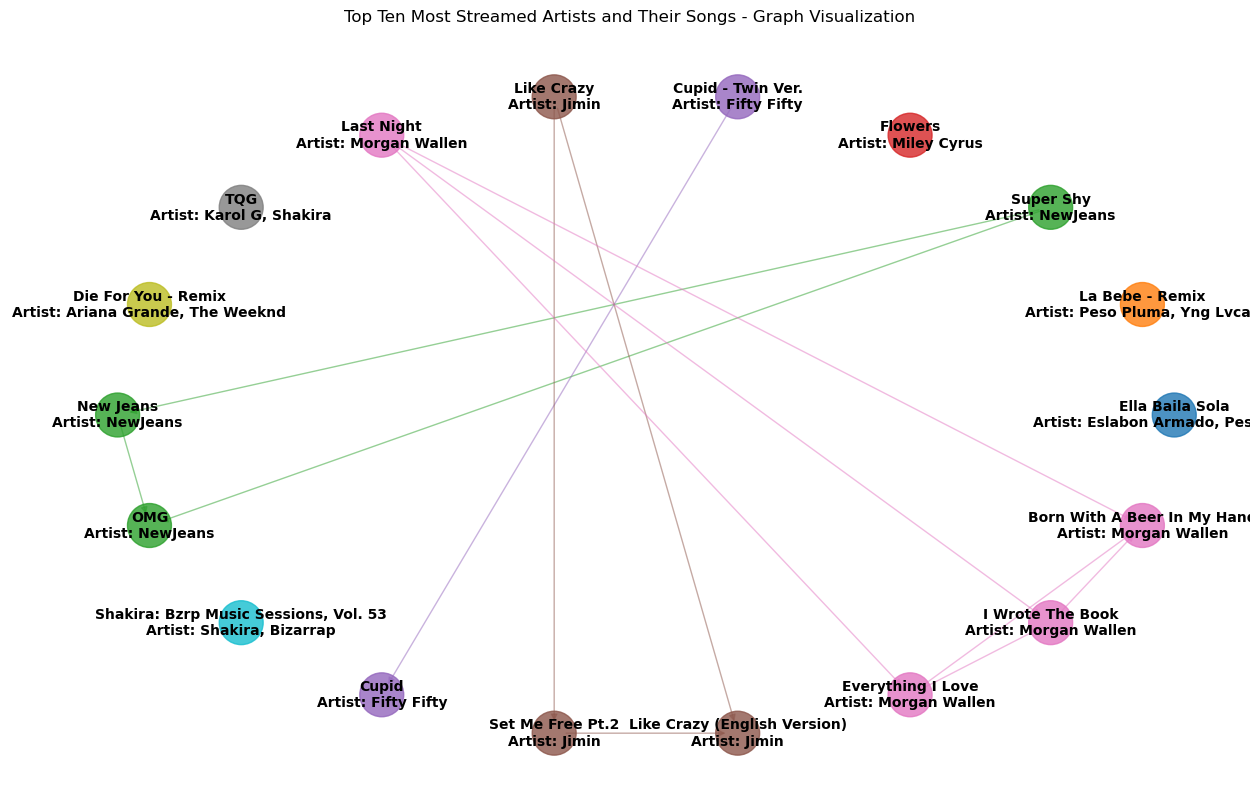

In [3]:

# Aggregate Streams by Artist
artist_streams = spotify_df.groupby('artist(s)_name')['streams'].sum()

# Sort Artists by Total Streams and Select Top Ten
top_ten_artists = artist_streams.nlargest(10)

# Filter Songs by Top Artists
top_songs_df = spotify_df[spotify_df['artist(s)_name'].isin(top_ten_artists.index)]

# Create a Directed Graph
G = nx.DiGraph()

# Add Nodes for Songs and Artists
for index, row in top_songs_df.iterrows():
    artist = row['artist(s)_name']
    song = row['Song']
    G.add_node(song, artist=artist)

# Add Edges Based on Relationships (Shared Artists)
for _, group in top_songs_df.groupby('artist(s)_name'):
    songs = group['Song'].tolist()
    for i, song in enumerate(songs):
        for j in range(i + 1, len(songs)):
            G.add_edge(song, songs[j])

# Create a color mapping for each artist
unique_artists = top_songs_df['artist(s)_name'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_artists)))
color_mapping = {artist: color for artist, color in zip(unique_artists, colors)}

# Assign colors to nodes and edges based on artist
node_colors = [color_mapping[G.nodes[node]['artist']] for node in G.nodes()]
edge_colors = [color_mapping[G.nodes[edge[0]]['artist']] for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(16, 10))

# Set positions for nodes
pos = nx.circular_layout(G)

# Draw nodes with assigned colors
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=node_colors, alpha=0.8)

# Draw edges with assigned colors
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color=edge_colors)

# Draw labels
node_labels = {node: f"{node}\nArtist: {G.nodes[node]['artist']}" for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Set plot title
plt.title('Top Ten Most Streamed Artists and Their Songs - Graph Visualization')

# Remove axis
plt.axis('off')

# Show the graph
plt.show()



In [4]:
# Export the graph to GraphML format
# nx.write_graphml(G, "spotify_network.graphml")

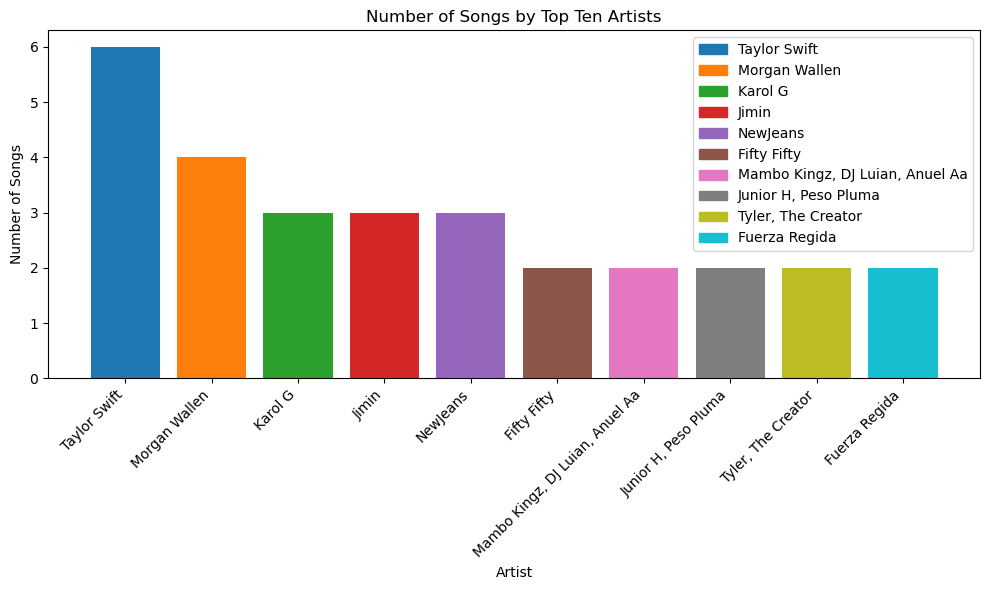

In [5]:

# Aggregate Streams by Artist
artist_counts = spotify_df['artist(s)_name'].value_counts()

# Select top ten artists
top_ten_artists = artist_counts.nlargest(10)

# Get unique colors for each artist
unique_artists = top_ten_artists.index
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_artists)))
color_mapping = {artist: color for artist, color in zip(unique_artists, colors)}

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(top_ten_artists.index, top_ten_artists.values, color=[color_mapping[artist] for artist in top_ten_artists.index])

# Set title and labels
plt.title('Number of Songs by Top Ten Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')

# Customize legend
handles = [plt.Rectangle((0,0),1,1, color=color_mapping[artist]) for artist in unique_artists]
plt.legend(handles, unique_artists)

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [7]:
# Calculate centrality measures with adjusted parameters
max_iter = 1000  # Increase the maximum number of iterations
tol = 1e-6       # Adjust the tolerance
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=max_iter, tol=tol)


In [8]:
# Calculate centrality measures with adjusted parameters
max_iter = 1000  # Increase the maximum number of iterations
tol = 1e-6       # Adjust the tolerance
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=max_iter, tol=tol)


NameError: name 'degree_centrality' is not defined